In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from pylab import *
from datetime import datetime
import matplotlib as mpl
plt.rcParams['agg.path.chunksize'] = 10000

In [ ]:
data=pd.read_csv("/content/data.csv")

**DATA-PREPROCESSING**

**CONVERTING DATE INTO DATE-TIME FORMAT FOR TIME SERIES ANALYSIS**

In [ ]:
data['time'] = data['time'].apply(pd.to_datetime)

In [ ]:
data['time'].isnull().sum()

0

In [ ]:
data1_plot=data.copy()

In [ ]:
data.head(3)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01


In [ ]:
data=data[pd.to_numeric(data['Cyclone_Inlet_Gas_Temp'], errors='coerce').notnull()]
data=data[pd.to_numeric(data["Cyclone_cone_draft"], errors='coerce').notnull()]
data=data[pd.to_numeric(data["Cyclone_Gas_Outlet_Temp"], errors='coerce').notnull()]
data=data[pd.to_numeric(data['Cyclone_Inlet_Draft'], errors='coerce').notnull()]
data=data[pd.to_numeric(data["Cyclone_Material_Temp"], errors='coerce').notnull()]
data=data[pd.to_numeric(data["Cyclone_Outlet_Gas_draft"], errors='coerce').notnull()]

In [ ]:
data2=data.copy()
data3=data.copy()

In [ ]:
data1_plot=data.copy()
data1_plot['date']=[d.date() for d in data['time']]
data1_plot['Time']=[d.time() for d in data['time']]
data1_plot.head(3)
data1_plot=data1_plot.set_index('Time')
data1_plot=data1_plot[["Cyclone_Inlet_Gas_Temp","Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]].astype(float)
data_30min_break=data1_plot[["Cyclone_Inlet_Gas_Temp","Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]].rolling(window = 5, center = True).mean()

**Plotting some box plot to find some outliers in data**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


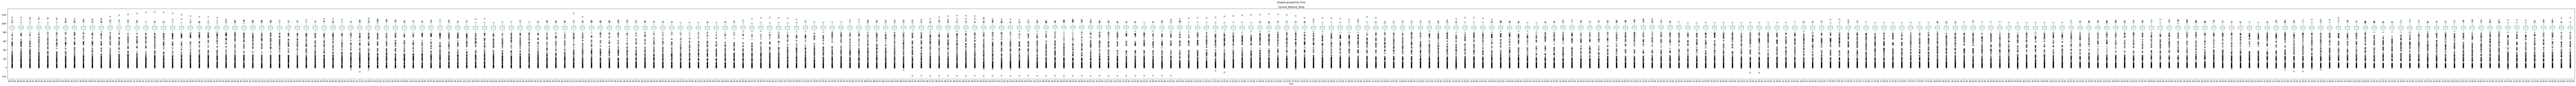

In [ ]:
data_30min_break.boxplot(by='Time',column=["Cyclone_Material_Temp"],grid=False,figsize=(240,7))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


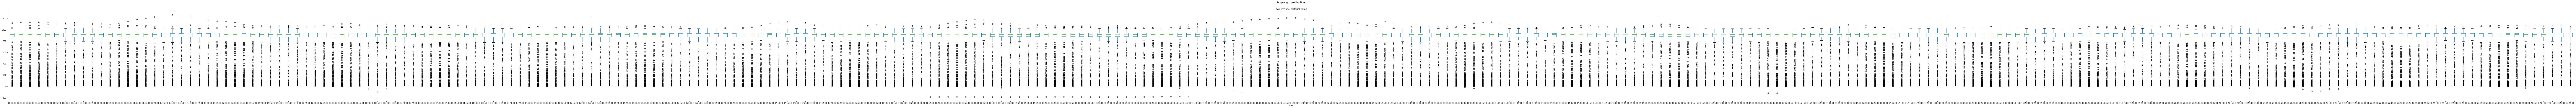

In [ ]:
data1_plot["avg_Cyclone_Material_Temp"]=data1_plot["Cyclone_Material_Temp"].rolling(5).mean()
data1_plot.boxplot(by='Time',column=["avg_Cyclone_Material_Temp"],grid=False,figsize=(240,9))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


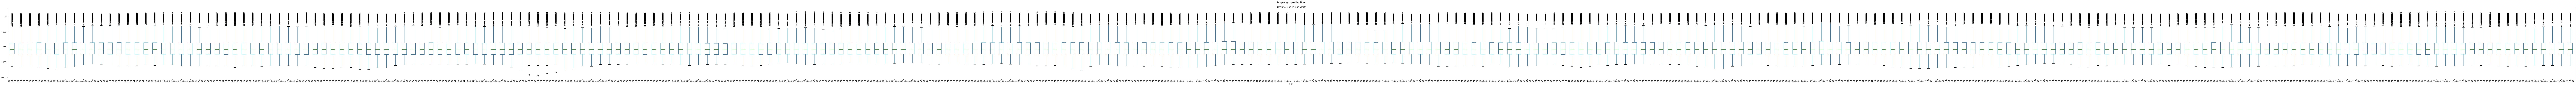

In [ ]:
#"Cyclone_Outlet_Gas_draft"
data_30min_break.boxplot(by='Time',column=["Cyclone_Outlet_Gas_draft"],grid=False,figsize=(240,7))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


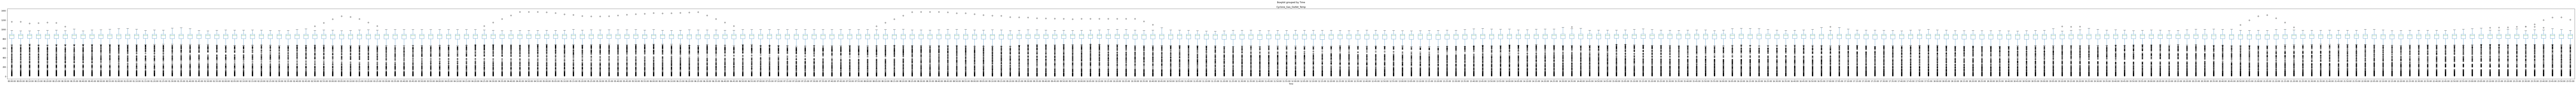

In [ ]:
data_30min_break.boxplot(by='Time',column=["Cyclone_Gas_Outlet_Temp"],grid=False,figsize=(240,7))

In [ ]:
data2.head(3)
data2=data2.set_index('time')

In [ ]:
data3['hour']=data3['time'].dt.hour
data3['minute']=data3['time'].dt.minute
data3['second']=data3['time'].dt.second

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376124 entries, 0 to 377718
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  object        
 2   Cyclone_Material_Temp     376124 non-null  object        
 3   Cyclone_Outlet_Gas_draft  376124 non-null  object        
 4   Cyclone_cone_draft        376124 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  object        
 6   Cyclone_Inlet_Draft       376124 non-null  object        
 7   hour                      376124 non-null  int64         
 8   minute                    376124 non-null  int64         
 9   second                    376124 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 31.6+ MB


In [ ]:
data3['hour']=data3['hour'].astype('str')
data3['minute']=data3['minute'].astype('str')
data3['second']=data3['second'].astype('str')
time_index=data3["hour"]+data3["minute"]+data3["second"]
data3['time_index']=data3['hour']+":"+data3["minute"]+":"+data3["second"]

In [ ]:
data3=data3.set_index('time_index')
data3.head(3)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,hour,minute,second
time_index,,,,,,,,,,
0:0:0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9,0,0,0
0:5:0,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76,0,5,0
0:10:0,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,0,10,0


**Plotting some box plot to find column with more outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


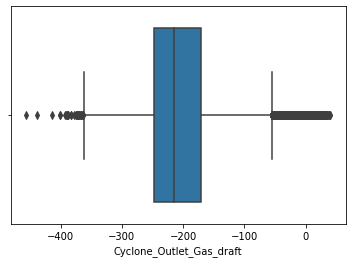

In [ ]:
sb.boxplot(data1_plot.Cyclone_Outlet_Gas_draft)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


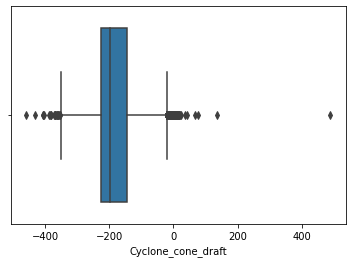

In [ ]:
sb.boxplot(data1_plot.Cyclone_cone_draft)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


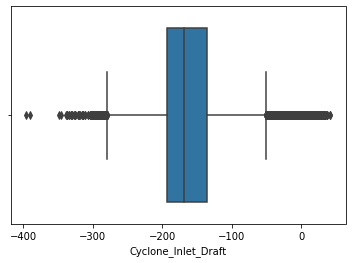

In [ ]:
sb.boxplot(data1_plot.Cyclone_Inlet_Draft)

**Model Building**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
data[["Cyclone_Inlet_Gas_Temp","Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]]=data[["Cyclone_Inlet_Gas_Temp","Cyclone_Material_Temp","Cyclone_Outlet_Gas_draft","Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp","Cyclone_Inlet_Draft"]].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376124 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  float64       
 2   Cyclone_Material_Temp     376124 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376124 non-null  float64       
 4   Cyclone_cone_draft        376124 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  float64       
 6   Cyclone_Inlet_Draft       376124 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.0 MB


In [ ]:
data['date']=[d.date() for d in data['time']]
data['Time']=[d.time() for d in data['time']]

In [ ]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=30000,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 30000, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F7A4D53E9E0, 'verbose': 0, 'warm_start': False}


**Anamoly score prediction to find anamoly data points**

In [ ]:
data['scores'] = model.decision_function(data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']])

data['anomaly_score'] = model.predict(data[['Cyclone_Outlet_Gas_draft','Cyclone_cone_draft','Cyclone_Inlet_Draft']])

data[data['anomaly_score']==-1].head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,date,Time,scores,anomaly_score
24,2017-01-01 02:00:00,880.62,931.83,-172.50,-155.09,875.71,-136.12,2017-01-01,02:00:00,-0.011099,-1
36,2017-01-01 03:00:00,874.88,940.33,-171.08,-153.21,875.44,-133.23,2017-01-01,03:00:00,-0.023985,-1
43,2017-01-01 03:35:00,861.07,925.61,-175.87,-156.64,864.66,-136.12,2017-01-01,03:35:00,-0.003763,-1
45,2017-01-01 03:45:00,877.08,935.74,-176.11,-150.99,871.83,-136.73,2017-01-01,03:45:00,-0.009526,-1
47,2017-01-01 03:55:00,909.43,956.26,-171.29,-158.91,892.23,-138.09,2017-01-01,03:55:00,-0.003729,-1


In [ ]:
data[data['anomaly_score']==-1].head(100)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,date,Time,scores,anomaly_score
24,2017-01-01 02:00:00,880.62,931.83,-172.50,-155.09,875.71,-136.12,2017-01-01,02:00:00,-0.011099,-1
36,2017-01-01 03:00:00,874.88,940.33,-171.08,-153.21,875.44,-133.23,2017-01-01,03:00:00,-0.023985,-1
43,2017-01-01 03:35:00,861.07,925.61,-175.87,-156.64,864.66,-136.12,2017-01-01,03:35:00,-0.003763,-1
45,2017-01-01 03:45:00,877.08,935.74,-176.11,-150.99,871.83,-136.73,2017-01-01,03:45:00,-0.009526,-1
47,2017-01-01 03:55:00,909.43,956.26,-171.29,-158.91,892.23,-138.09,2017-01-01,03:55:00,-0.003729,-1
...,...,...,...,...,...,...,...,...,...,...,...
364,2017-01-02 06:20:00,894.54,929.72,-180.05,-105.59,875.01,-147.86,2017-01-02,06:20:00,-0.068906,-1
365,2017-01-02 06:25:00,874.63,928.49,-181.92,-105.63,866.79,-142.75,2017-01-02,06:25:00,-0.073023,-1
366,2017-01-02 06:30:00,886.25,928.11,-183.18,-105.63,874.11,-148.22,2017-01-02,06:30:00,-0.066648,-1
367,2017-01-02 06:35:00,890.52,931.28,-181.98,-105.63,877.74,-148.15,2017-01-02,06:35:00,-0.067310,-1


In [ ]:
accuracy = 100*list(data['anomaly_score']).count(-1)/75225
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376124 entries, 0 to 377718
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  float64       
 2   Cyclone_Material_Temp     376124 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376124 non-null  float64       
 4   Cyclone_cone_draft        376124 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  float64       
 6   Cyclone_Inlet_Draft       376124 non-null  float64       
 7   date                      376124 non-null  object        
 8   Time                      376124 non-null  object        
 9   scores                    376124 non-null  float64       
 10  anomaly_score             376124 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usag

In [ ]:
data.to_excel('anamoly_data.xlsx', sheet_name = 'New_sheet')

**Loading created data frame and making plots on time for visualization**

In [ ]:
new_data=pd.read_csv("/content/anamoly_data.csv")

In [ ]:
new_data.head(2)

,Unnamed: 0,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,date,Time,scores,anomaly_score
0,0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,2017-01-01,00:00:00,0.054026,1.0
1,1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,2017-01-01,00:05:00,0.063856,1.0


In [ ]:
new_index=new_data['Time']
new_index=new_index.drop_duplicates(keep ='first')

In [ ]:
anamoly_count=0.0
anamoly_df=pd.DataFrame(index=[new_index],columns=['anamoly_count'])
anamoly_df["anamoly_count"]=0.0

In [ ]:
anamoly_df = anamoly_df.drop(anamoly_df.index[288])


In [ ]:
anamoly_df['anamoly_count'].astype('int')

Time    
00:00:00    0
00:05:00    0
00:10:00    0
00:15:00    0
00:20:00    0
           ..
23:35:00    0
23:40:00    0
23:45:00    0
23:50:00    0
23:55:00    0
Name: anamoly_count, Length: 288, dtype: int64

In [ ]:
def frequency_calculation(x):
  anamoly_df["anamoly_count"].loc[x]=anamoly_df["anamoly_count"].loc[x]+1


In [ ]:
for i,j in new_data.iterrows():
  if(new_data['anomaly_score'].loc[i]==-1.0):
    frequency_calculation(new_data['Time'].loc[i])

In [ ]:
anamoly_df["anamoly_count"].nlargest(10)

Time    
11:10:00    75.0
11:15:00    75.0
11:20:00    75.0
04:40:00    73.0
06:20:00    73.0
07:50:00    72.0
10:40:00    72.0
11:30:00    72.0
22:40:00    72.0
04:00:00    71.0
Name: anamoly_count, dtype: float64

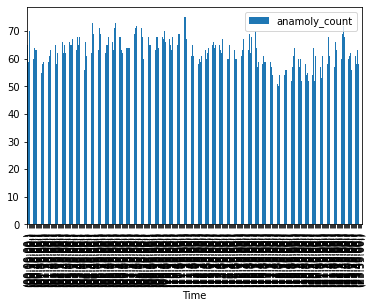

In [ ]:
anamoly_df.plot.bar()

**Top 10 most favourable time for anamoly behaviour**

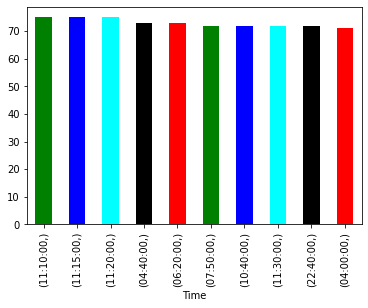

In [106]:
anamoly_df["anamoly_count"].nlargest(10).plot.bar(color=[ 'green', 'blue', 'cyan','black', 'red'])
